In [84]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [90]:
dataset_path = "/kaggle/input/animal-dataset/animal_dataset"
classes = ["cat", "dog", "panda"]

images = []
labels = []

for label, cls in enumerate(classes):
    folder_path = os.path.join(dataset_path, cls)
    
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32))

        images.append(img.flatten())
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

In [92]:
images.shape, labels.shape

((300, 1024), (300,))

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

K_values = [1, 3, 5, 7, 9, 11]
accuracy_L1 = []
accuracy_L2 = []


def evaluate_knn(distance_metric):
    results = []
    
    for k in K_values:
        fold_accuracies = []

        for train_idx, test_idx in kf.split(images):
            X_train, X_test = images[train_idx], images[test_idx]
            y_train, y_test = labels[train_idx], labels[test_idx]

            knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
            knn.fit(X_train, y_train)
            preds = knn.predict(X_test)

            acc = accuracy_score(y_test, preds)
            fold_accuracies.append(acc)

        results.append(np.mean(fold_accuracies))

    return results

accuracy_L1 = evaluate_knn("manhattan")
accuracy_L2 = evaluate_knn("euclidean")

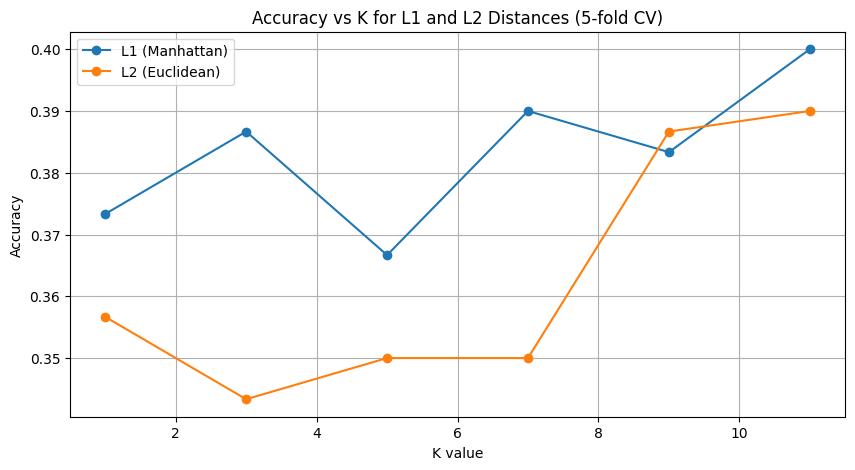

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(K_values, accuracy_L1, marker="o", label="L1 (Manhattan)")
plt.plot(K_values, accuracy_L2, marker="o", label="L2 (Euclidean)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for L1 and L2 Distances (5-fold CV)")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
best_k = K_values[np.argmax(accuracy_L2)]
print("Best K (Based on Euclidean Accuracy):", best_k)

final_knn = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
final_knn.fit(images, labels)

Best K (Based on Euclidean Accuracy): 11


KNeighborsClassifier(metric='euclidean', n_neighbors=11)


Showing Top 5 Predictions:



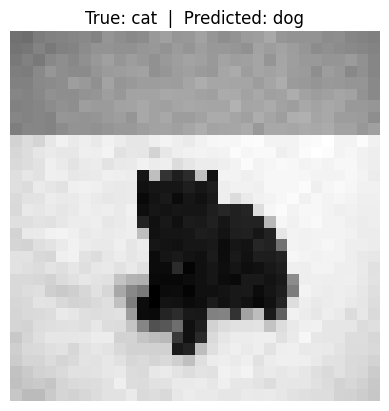

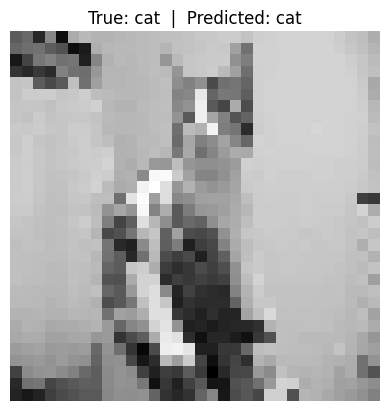

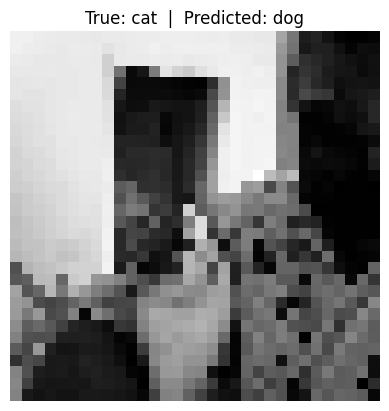

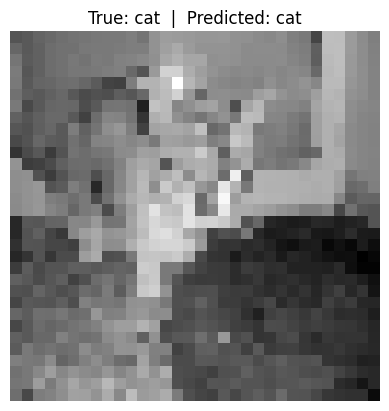

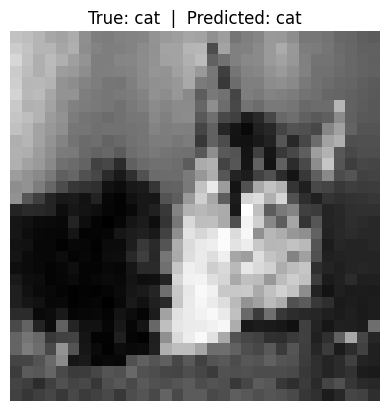

In [89]:
def show_top5_predictions(model, X, y_true):
    print("\nShowing Top 5 Predictions:\n")

    for i in range(5):
        img = X[i]
        true_label = classes[y_true[i]]

        img_reshaped = img.reshape(32, 32)
        pred_label = classes[model.predict([img])[0]]

        plt.imshow(img_reshaped, cmap='gray')
        plt.title(f"True: {true_label}  |  Predicted: {pred_label}")
        plt.axis('off')
        plt.show()


show_top5_predictions(final_knn, images, labels)